In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import xarray as xa
import pandas as pd
import seaborn as sb
from corner import corner
from pytransit.orbits import epoch
from pytransit.contamination.plotting import _jplot, joint_marginal_plot, plot_kdist, plot_two_sided_kde

from src.core import *

In [3]:
AACW = 3.46
AAPW = 7.1

In [4]:
%run toi_2266.py

In [54]:
lpf = LPF('TOI-2266b-joint', downsample=120.)

In [6]:
with xa.load_dataset('TOI-2266.01-joint-contaminated-a.nc') as ds:
    fc = array(ds['mcmc_samples']).reshape([-1, ds.parameter.size])
    df = pd.DataFrame(fc, columns=ds.parameter)

In [7]:
pv = df.median().values

In [42]:
ncols = [c for c in df.columns if 'wn' in c]

In [51]:
len(ncols) / 6

12.333333333333334

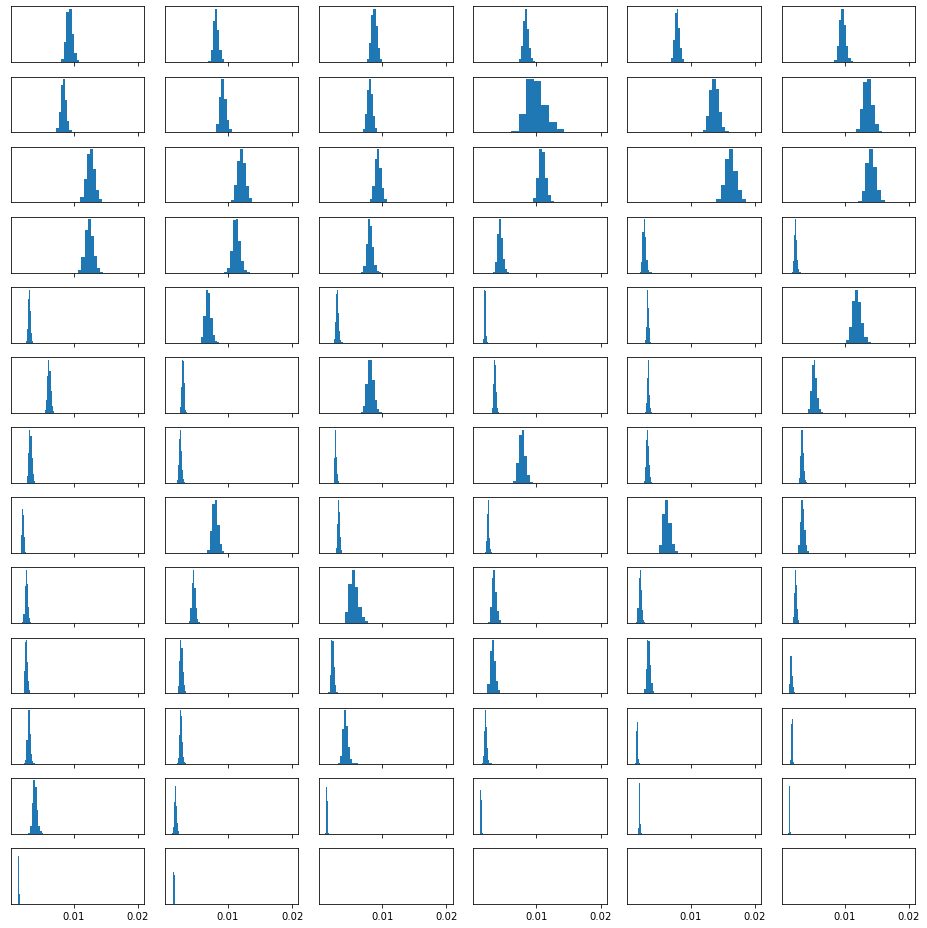

In [53]:
fig, axs = subplots(13, 6, figsize=(13,13), sharex='all')
for i in range(len(ncols)):
    axs.flat[i].hist(10**df[ncols[i]])
setp(axs, yticks=[])
fig.tight_layout()

In [55]:
tm = lpf.timea
fo = lpf.ofluxa / lpf.baseline(pv)
fm = squeeze(lpf.transit_model(pv))

In [56]:
epochs_all = array([epoch(t.mean(), pv[0], pv[1]) for t in lpf.times])
epochs_gb =  array([epochs_all[i] for i in range(len(epochs_all)) if lpf.pbids[i] != 0])

In [57]:
gbnights = unique(epochs_gb)
ngbnights = gbnights.size

In [58]:
eids = zeros_like(epochs_gb)
for i, e in enumerate(unique(epochs_gb)):
    eids[epochs_gb == e] = i

In [59]:
m2lcs = [lci for lci, ins in enumerate(lpf.ins) if ins=='M2']
m2eps = [epoch(lpf.times[i].mean(), pv[0], pv[1]) for i in m2lcs]
m2nights = unique(m2eps).size

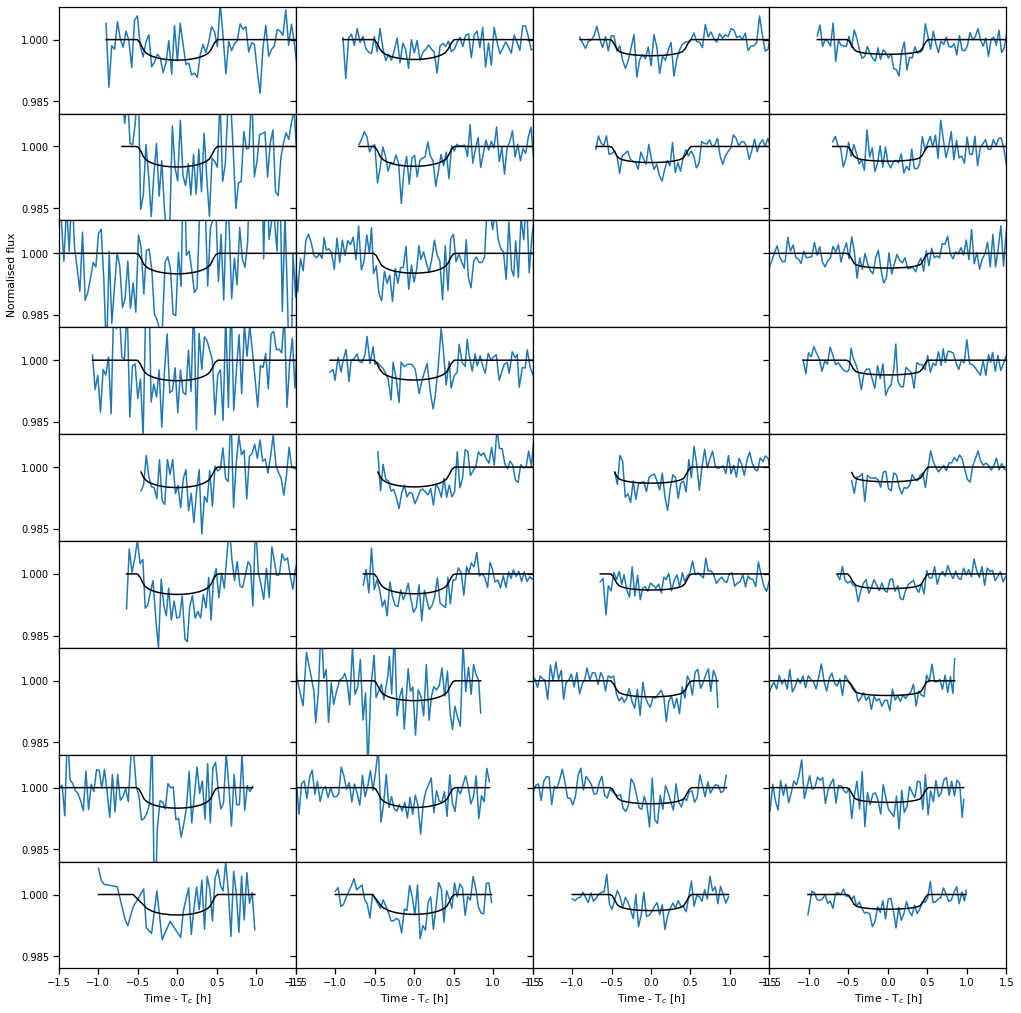

In [60]:
with sb.plotting_context('notebook', font_scale=0.9):
    fig, axs = subplots(m2nights, 4, figsize=(2*AAPW, 2*AAPW), sharey='all', sharex='all')
    ep = m2eps[0]
    irow = 0
    for i,j in enumerate(m2lcs):
        sl = lpf.lcslices[j]
        if ep != m2eps[i]:
            ep = m2eps[i]
            irow += 1
        ipb = lpf.pbids[j] - 1
        t0 = pv[0] + ep*pv[1]
        axs[irow, ipb].plot(24*(tm[sl] - t0), fo[sl])
        axs[irow, ipb].plot(24*(tm[sl] - t0), fm[sl], 'k')

    setp(axs, xlim=(-1.5, 1.5), ylim=(0.982, 1.008), yticks=[0.985, 1.0])
    setp(axs[-1], xlabel='Time - T$_c$ [h]')
    setp(axs[2,0], ylabel='Normalised flux')
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.0, wspace=0.0)

In [24]:
with sb.plotting_context('notebook', font_scale=0.9):
    fig, axs = subplots(m2nights, 4, figsize=(2*AAPW, 2*AAPW), sharey='all', sharex='all')
    for i in 
    j = 0
    for i,(e, sl) in enumerate(zip(epochs_all, lpf.lcslices)):
        if lpf.pbids[i] != 0:
            eid, pbid = eids[j], lpf.pbids[i]-1
            t0 = pv[0] + e*pv[1]
            ax = axs[eid, pbid]
            ax.plot(24*(tm[sl] - t0), fo[sl], '.k', alpha=0.25, ms=6)
            ax.plot(24*(tm[sl] - t0), fm[sl], 'k')
            j += 1
    for i,pb in enumerate("g r i z_s".split()):
        axs[0,i].set_title(f'MuSCAT2 {pb}')
    setp(axs, xlim=(-1.5, 1.5), ylim=(0.982, 1.008), yticks=[0.985, 1.0])
    setp(axs[-1], xlabel='Time - T$_c$ [h]')
    setp(axs[2,0], ylabel='Normalised flux')
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.0, wspace=0.0)
    #fig.savefig('plots/toi_532b_gb_lcs.pdf')

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 4, 1, 2, 4, 1, 2, 3, 4, 1, 2, 3, 4,
       2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])

array([ 0, 18, 26, 29, 36, 39, 58, 64, 67])

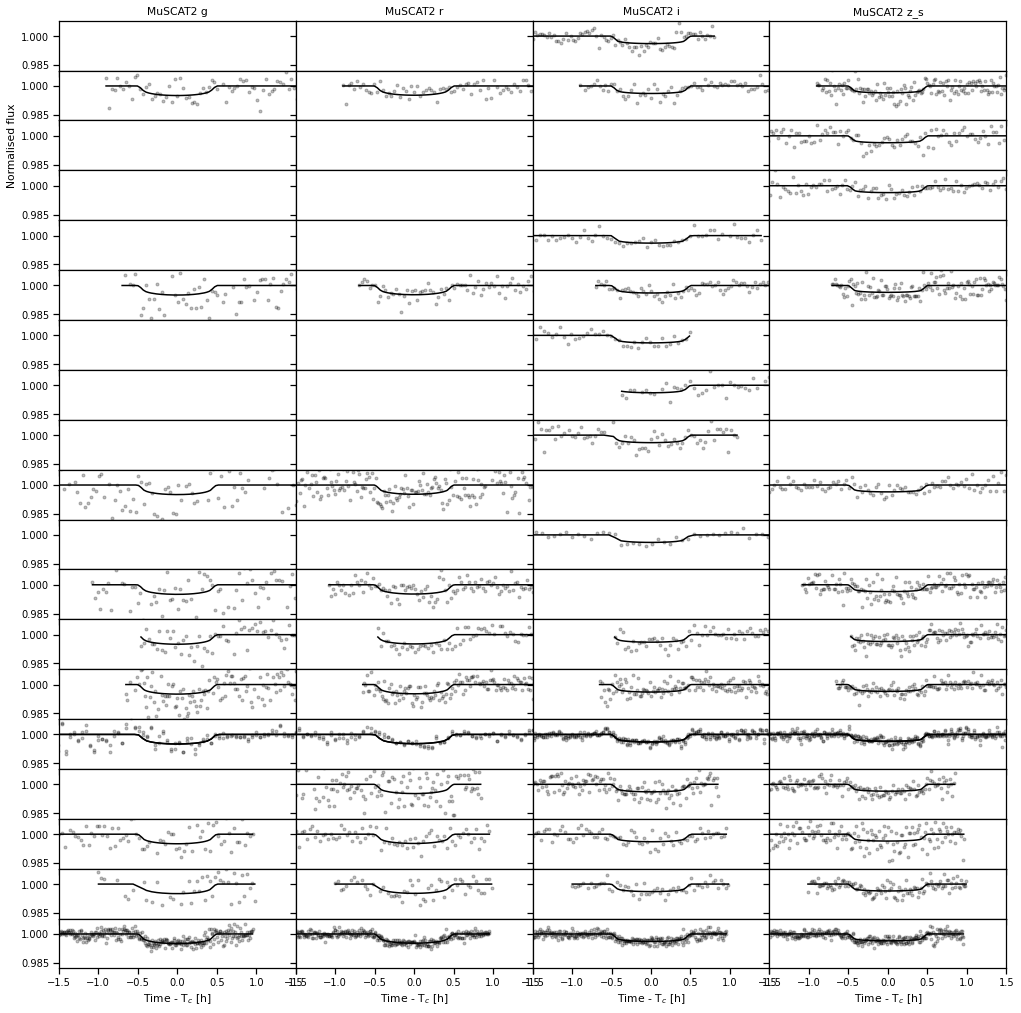

In [12]:
with sb.plotting_context('notebook', font_scale=0.9):
    fig, axs = subplots(ngbnights, 4, figsize=(2*AAPW, 2*AAPW), sharey='all', sharex='all')
    j = 0
    for i,(e, sl) in enumerate(zip(epochs_all, lpf.lcslices)):
        if lpf.pbids[i] != 0:
            eid, pbid = eids[j], lpf.pbids[i]-1
            t0 = pv[0] + e*pv[1]
            ax = axs[eid, pbid]
            ax.plot(24*(tm[sl] - t0), fo[sl], '.k', alpha=0.25, ms=6)
            ax.plot(24*(tm[sl] - t0), fm[sl], 'k')
            j += 1
    for i,pb in enumerate("g r i z_s".split()):
        axs[0,i].set_title(f'MuSCAT2 {pb}')
    setp(axs, xlim=(-1.5, 1.5), ylim=(0.982, 1.008), yticks=[0.985, 1.0])
    setp(axs[-1], xlabel='Time - T$_c$ [h]')
    setp(axs[2,0], ylabel='Normalised flux')
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.0, wspace=0.0)
    #fig.savefig('plots/toi_532b_gb_lcs.pdf')

In [17]:
phase = (fold(lpf.timea[lpf._ntess:], pv[1], pv[0], 0.5) - 0.5) * pv[1]
oflux = lpf.ofluxa[lpf._ntess:]

In [18]:
sids = argsort(phase)
bp, bf = downsample_time(phase[sids], oflux[sids], 300) 

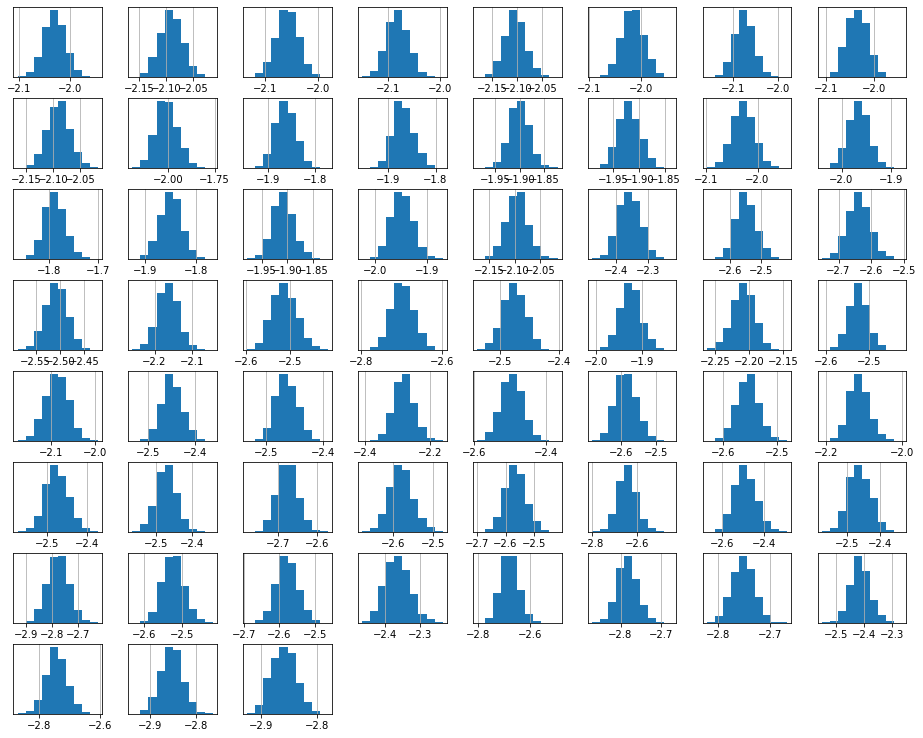

In [19]:
axs = df.iloc[:,lpf._sl_wn].hist(figsize=(16,13))
setp(axs, yticks=[], title='');

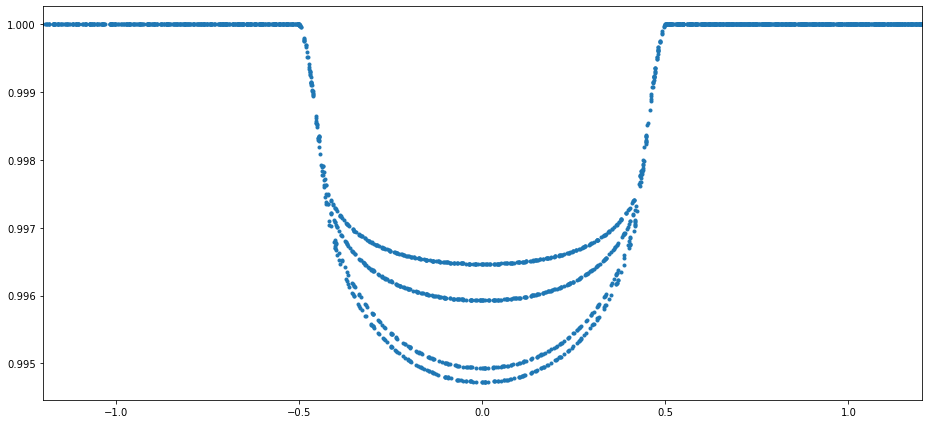

In [37]:
fig, ax = subplots(figsize=(13,6))
ax.plot(24*phase, lpf.transit_model(pv)[0, lpf._ntess:], '.')
setp(ax, xlim=(-1.2, 1.2))
fig.tight_layout()

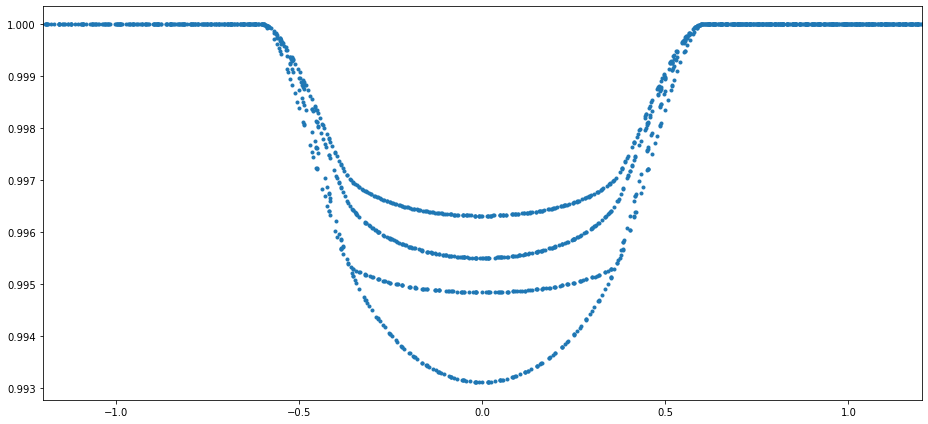

In [72]:
fig, ax = subplots(figsize=(13,6))
ax.plot(24*phase, lpf.transit_model(pv)[0, lpf._ntess:], '.')
setp(ax, xlim=(-1.2, 1.2))
fig.tight_layout()

(-1.5, 1.5)

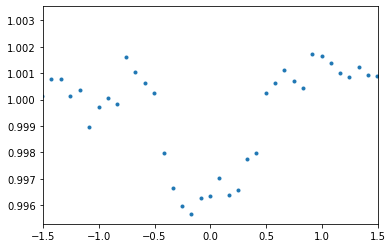

In [22]:
plot(24*bp, bf, '.')
xlim(-1.5,1.5)

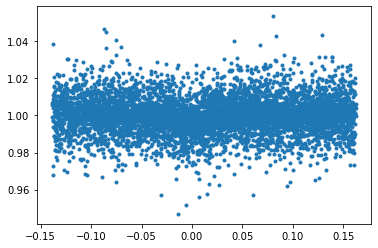

In [41]:
plot(phase, lpf.ofluxa, '.')

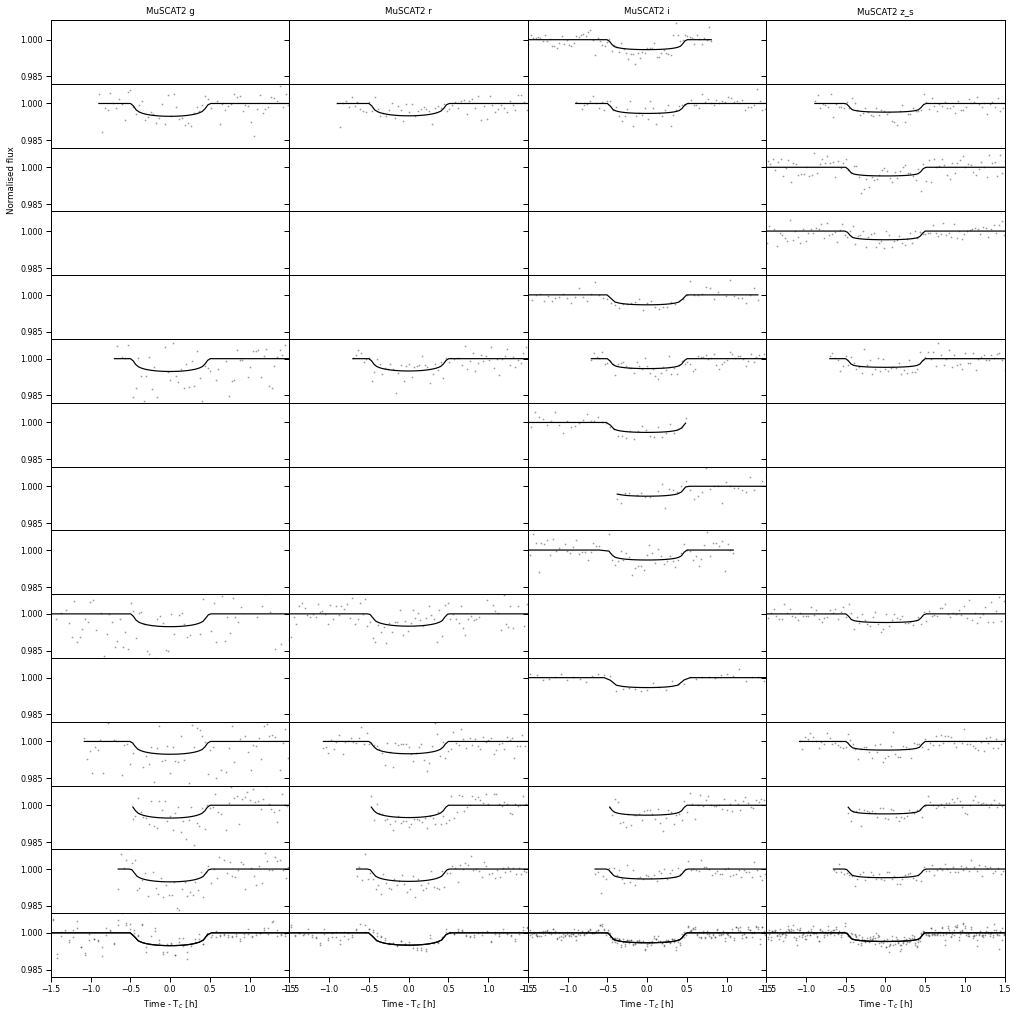

In [23]:
with sb.plotting_context('paper', font_scale=0.9):
    fig, axs = subplots(ngbnights, 4, figsize=(2*AAPW, 2*AAPW), sharey='all', sharex='all')
    j = 0
    for i,(e, sl) in enumerate(zip(epochs_all, lpf.lcslices)):
        if lpf.pbids[i] != 0:
            eid, pbid = eids[j], lpf.pbids[i]-1
            t0 = pv[0] + e*pv[1]
            ax = axs[eid, pbid]
            ax.plot(24*(tm[sl] - t0), fo[sl], '.k', alpha=0.25, ms=2)
            ax.plot(24*(tm[sl] - t0), fm[sl], 'k')
            j += 1
    for i,pb in enumerate("g r i z_s".split()):
        axs[0,i].set_title(f'MuSCAT2 {pb}')
    setp(axs, xlim=(-1.5, 1.5), ylim=(0.982, 1.008), yticks=[0.985, 1.0])
    setp(axs[-1], xlabel='Time - T$_c$ [h]')
    setp(axs[2,0], ylabel='Normalised flux')
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.0, wspace=0.0)
    #fig.savefig('plots/toi_532b_gb_lcs.pdf')

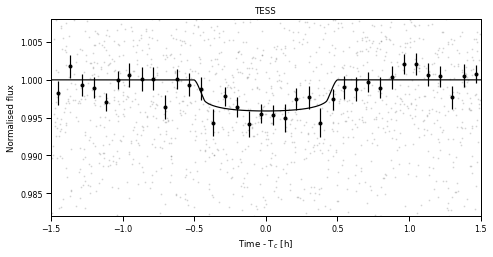

In [24]:
with sb.plotting_context('paper', font_scale=0.9):
    fig = lpf.plot_folded_tess_transit(pv=pv, figsize=(2*AACW, 2*0.5*AACW), 
                                       xlim=(-1.5, 1.5), ylim=(0.982, 1.008),
                                       binwidth=5)
    fig.axes[0].set_title('TESS')
    #fig.savefig('plots/toi_532b_tess_lcs.pdf')

In [81]:
from astropy.units import AU, Rsun, Rjup
from pytransit.orbits import as_from_rhop, i_from_ba, d_from_pkaiews, epoch

def derive_qois(df_original, rstar, star_teff):
    df = df_original.copy()
    ns = df.shape[0]

    rstar_d = normal(rstar.n, rstar.s, size=ns) * Rsun
    period = df.p.values if 'p' in df.columns else df.pr.values

    df['period'] = period
    df['k_true'] = sqrt(df.k2_true)
    df['k_app'] = sqrt(df.k2_app)
    df['cnt'] = 1. - df.k2_app / df.k2_true
    df['a_st'] = as_from_rhop(df.rho.values, period)
    df['a_au'] = df.a_st * rstar_d.to(AU)
    df['inc'] = degrees(i_from_ba(df.b.values, df.a_st.values))
    df['t14'] = d_from_pkaiews(period, df.k_true.values, df.a_st.values, radians(df.inc.values), 0.0, 0.0, 1)
    df['t14_h'] = 24 * df.t14

    df['r_app'] = df.k_app.values * rstar_d.to(Rjup)
    df['r_true'] = df.k_true.values * rstar_d.to(Rjup)

    df['r_app_rsun'] = df.k_app.values * rstar_d.to(Rsun)
    df['r_true_rsun'] = df.k_true.values * rstar_d.to(Rsun)
    df['teff_p'] = Teq(normal(star_teff.n, star_teff.s, size=ns), df.a_st, uniform(0.25, 0.50, ns), uniform(0, 0.4, ns))
    return df

dfd = derive_qois(df, star_r, star_teff)

<AxesSubplot:>

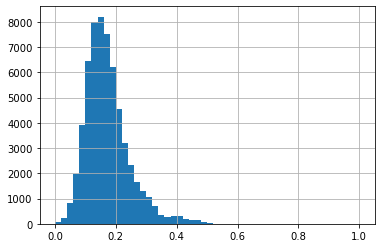

In [82]:
dfd.cnt.hist(range=(0.00,1.0), bins=50)

<AxesSubplot:>

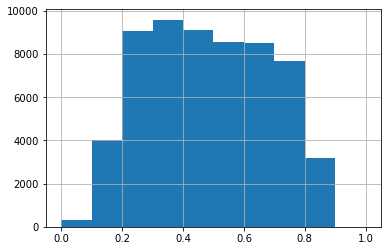

In [39]:
dfd.cnt.hist(range=(0.00,1.0))

<AxesSubplot:>

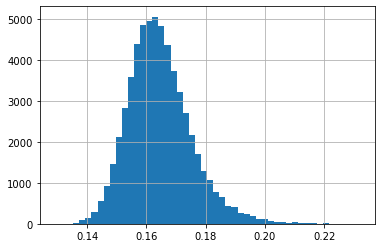

In [83]:
dfd.r_true.hist(bins=50)

<AxesSubplot:>

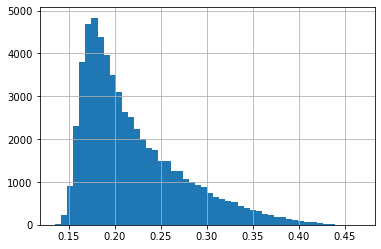

In [42]:
dfd.r_true.hist(bins=50)

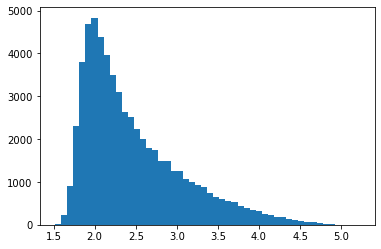

In [50]:
hist((dfd.r_true.values * u.R_jup).to(u.R_earth).value, bins=50);

<AxesSubplot:>

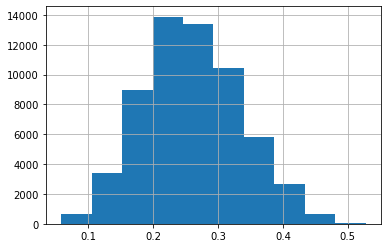

In [117]:
dfd.k_true.hist()

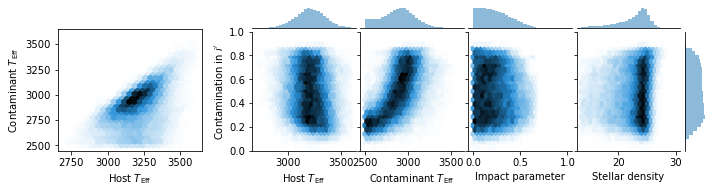

In [40]:
joint_marginal_plot(dfd, htelim=(2700, 3600), ctelim=(2500,3600), blim=(0, 1.0), rlim=(13.5, 30.0));

In [86]:
0.0005 *1e6

500.0

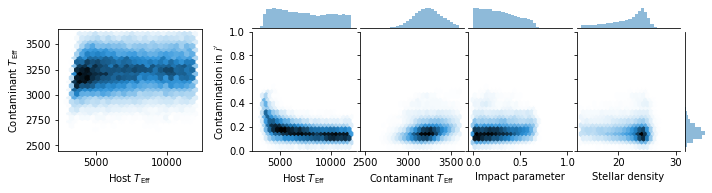

In [84]:
joint_marginal_plot(dfd, htelim=(2700, 12000), ctelim=(2500,3600), blim=(0, 1.0), rlim=(13.5, 30.0));

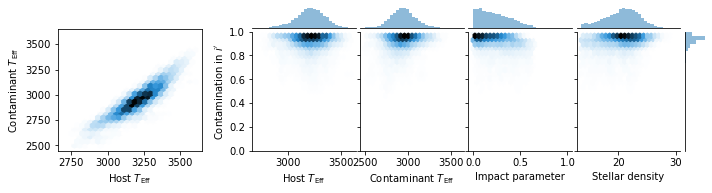

In [12]:
joint_marginal_plot(dfd, htelim=(2700, 3600), ctelim=(2500,3600), blim=(0, 1.0), rlim=(13.5, 30.0));

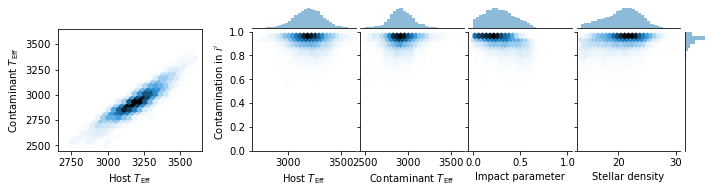

In [63]:
joint_marginal_plot(dfd, htelim=(2700, 3600), ctelim=(2500,3600), blim=(0, 1.0), rlim=(13.5, 30.0));

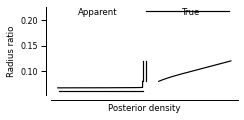

In [50]:
with sb.plotting_context('paper', font_scale=0.9):
    fig, ax = subplots(figsize=(AACW, 0.5*AACW))
    plot_two_sided_kde(dfd.k_app, dfd.k_true, clip=(0.08, 0.12), bw=0.2, ax=ax)
    setp(ax, ylabel='Radius ratio', xlabel='Posterior density', xticks=[])
    ax.text(0.25, 0.99, 'Apparent', ha='center', va='top', transform=ax.transAxes)
    ax.text(0.75, 0.99, 'True', ha='center', va='top', transform=ax.transAxes)
    sb.despine(fig, offset=5)
    fig.tight_layout()
    #fig.savefig('plots/toi_532b_k_posterior.pdf')

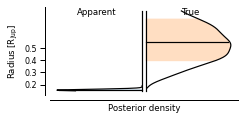

In [49]:
with sb.plotting_context('paper', font_scale=0.9):
    fig, ax = subplots(figsize=(AACW, 0.5*AACW))
    plot_two_sided_kde(dfd.r_app, dfd.r_true, clip=(0.15, 0.8), bw=0.2, ax=ax)
    setp(ax, ylabel='Radius [R$_\mathrm{Jup}$]', xlabel='Posterior density', xticks=[], yticks=(0.2, 0.3, 0.4, 0.5))
    ax.text(0.25, 0.99, 'Apparent', ha='center', va='top', transform=ax.transAxes)
    ax.text(0.75, 0.99, 'True', ha='center', va='top', transform=ax.transAxes)
    sb.despine(fig, offset=5)
    fig.tight_layout()
    #fig.savefig('plots/toi_532b_radius_posterior.pdf')